# The relationship between renewable electricity generation and demand in Denmark

**In this project we will find and import data from Energinet Danmark showing the  generation of renewable energy in Denmark in 2022. In this analysis, we import, clean, analyze and visualize data.**

Renewable electricity is an important factor of the green transition, with Denmark having an ambition of being independent of fossil fuel before 2050. As Denmark is a leader in renewable energy, a deeper understanding of the relationship between renewable electricity demand and production can lead to more informed decisions regarding the optimization of renewable energy usage, which can help to significantly reduce greenhouse gas emissions. Furthermore, Denmark's success in renewable energy can serve as an inspiring model for other countries to follow in their transition towards a sustainable future. 



Imports and set magics:

In [1]:
!pip install requests;

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime as dt
import requests

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We import data from the Danish Transmission System Operator (TSO) called Energinet using an API, this is seen in the py.file. It retrieves data related to renewable energy production in Denmark specifically for the year 2022. The imported data includes information such as hourly production values for different renewable sources like offshore wind, onshore wind, solar, and hydro power.

In [19]:
#Import data
import dataproject as datp


In [20]:
# Save dataframe as df
df = datp.df

Next we examine the 'HourDK' column, and the code determines if there are any duplicate values present. It compares each timestamp against others in the column to find instances where the same timestamp appears more than once. This check helps ensure the integrity and accuracy of the dataset.

In [22]:
#Check for duplicates
mylist = df['HourDK'].values.tolist()

dup = {x for x in mylist if mylist.count(x) > 2} #More than 2 due to two zones

# Print duplicates
print('The number of duplicates are:', len(dup))
print('Duplicates:', dup)

dup_index = df.index[df['HourDK'] == next(iter(dup))]
print('Indicies of observations:', dup_index)


The number of duplicates are: 1
Duplicates: {'2022-10-30T02:00:00'}
Indicies of observations: Int64Index([3018, 3019, 3020, 3021], dtype='int64')


The code addresses a specific duplicate entry in the dataset, which occurs at the timestamp '2022-10-30 02:00:00'. This duplication is a result of the transition between summertime and wintertime, where the clock is adjusted by one hour. Despite being a duplicate, this particular entry is intentionally kept in the dataset

## Explore data set

We clean the data by creating a sub dataframe, which only containts the columns needed for the later analysis. Thereafter, we create aggregated variables and find the total generation in Denmark by grouping the two energy production zones in Denmark; DK1 and DK2.

In [24]:
# We create a sub dataframe
df2 = df[['HourDK', 'PriceArea', 'OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh', 'OnshoreWindLt50kW_MWh', 'OnshoreWindGe50kW_MWh', 'HydroPowerMWh', 'SolarPowerLt10kW_MWh', 'SolarPowerGe10Lt40kW_MWh', 'SolarPowerGe40kW_MWh', 'SolarPowerSelfConMWh', 'UnknownProdMWh', 'GrossConsumptionMWh']].copy()

# Create new variables
df2['Offshore_MWh'] = df2['OffshoreWindLt100MW_MWh'] + df2['OffshoreWindGe100MW_MWh']
df2['Onshore_MWh'] = df2['OnshoreWindLt50kW_MWh'] + df2['OnshoreWindGe50kW_MWh']
df2['Solar_MWh'] = df2['SolarPowerLt10kW_MWh'] + df2['SolarPowerGe10Lt40kW_MWh'] + df2['SolarPowerGe40kW_MWh'] + df2['SolarPowerSelfConMWh']

# Group DK1 and DK2 to get total generation and consumption for DK
df2 = df2.groupby(['HourDK'], as_index=False).sum()

#Show first 10 observations
df2.head(10)

,HourDK,OffshoreWindLt100MW_MWh,OffshoreWindGe100MW_MWh,OnshoreWindLt50kW_MWh,OnshoreWindGe50kW_MWh,HydroPowerMWh,SolarPowerLt10kW_MWh,SolarPowerGe10Lt40kW_MWh,SolarPowerGe40kW_MWh,SolarPowerSelfConMWh,UnknownProdMWh,GrossConsumptionMWh,Offshore_MWh,Onshore_MWh,Solar_MWh
0,2022-01-01T00:00:00,144.484727,1747.386902,4.813434,1273.360534,1.637731,0.056808,0.009113,0.031290,0.000000,5.171680,3611.806640,1891.871629,1278.173968,0.097211
1,2022-01-01T01:00:00,150.110846,1751.599793,4.744580,1340.005585,1.641966,0.054143,0.009111,0.027780,0.000000,4.867611,3600.315186,1901.710639,1344.750165,0.091034
2,2022-01-01T02:00:00,130.517198,1796.572266,4.011871,1224.645172,1.637933,0.051622,0.008281,0.028540,0.000000,5.019980,3490.401734,1927.089464,1228.657043,0.088443
3,2022-01-01T03:00:00,136.758549,1628.485839,3.190033,1049.801178,1.639639,0.056474,0.008878,0.028670,0.000000,4.862911,3316.040405,1765.244388,1052.991211,0.094022
4,2022-01-01T04:00:00,141.342327,1317.700196,2.662985,1026.876068,1.634412,0.048473,0.009171,0.028560,0.000000,3.409950,3311.823486,1459.042523,1029.539053,0.086204
5,2022-01-01T05:00:00,167.906648,1357.843261,2.244875,865.035126,1.630415,0.045163,0.010003,0.029290,0.000000,1.103199,3297.536743,1525.749909,867.280001,0.084456
6,2022-01-01T06:00:00,144.208806,1262.609497,1.957026,824.078827,2.048508,0.046989,0.011321,0.029481,0.000000,1.365939,3357.753052,1406.818303,826.035853,0.087791
7,2022-01-01T07:00:00,135.396731,1286.045472,1.348905,611.435715,2.059080,0.048818,0.011868,0.027100,0.000000,4.719170,3375.053589,1421.442203,612.784620,0.087786
8,2022-01-01T08:00:00,80.999092,1027.472138,0.937185,454.381866,2.059469,0.053785,0.012217,0.157525,0.000000,4.742440,3494.955932,1108.471230,455.319051,0.223527
9,2022-01-01T09:00:00,45.681921,692.309944,0.635733,326.988037,2.060531,0.223377,0.024926,8.828510,0.139187,3.847649,3630.294311,737.991865,327.623770,9.216000


The dataframe shows the hourly data of the electricity generation. It is split up in the energy from offshore wind, onshore wind, hydro power, solar power and unkown production. 
Ofshore wind, onshore wind and solar wind are then added together to get a gross consumption for the three groups, where it can be seen, that onshore wind is the biggest contributor of the electricity generation groups.


# Analysis

### Summary Statistics

We begin by making summary statistics for the gross consumption, offshore wind, onshore wind, solar power and hydro power. We focus on the no. of observations, minimum value, maximum value and the mean.

In [13]:
# Summary statistics
sumstat = df2.agg(
    {
        "GrossConsumptionMWh": ["count", "min", "max", "mean"],
        "Offshore_MWh": ["count", "min", "max", "mean"],
        "Onshore_MWh": ["count", "min", "max", "mean"],
        "Solar_MWh": ["count", "min", "max", "mean"],
        "HydroPowerMWh": ["count", "min", "max", "mean"],
    
    }
)

# Transposing the table
sumstat.transpose()

,count,min,max,mean
GrossConsumptionMWh,8759.0,2418.566101,6408.334717,4051.110832
Offshore_MWh,8759.0,0.068139,2219.296855,998.149426
Onshore_MWh,8759.0,3.430430,4089.387108,1173.761187
Solar_MWh,8759.0,0.080414,1663.678013,251.463328
HydroPowerMWh,8759.0,0.373985,4.823965,1.706491


The table above shows a descriptive analysis of the danish electricity generation in 2022. The mean gross consumption of renewable energy is 4050.8 MWH every hour. We see that the onshore production from windmill farms, is by far the biggest contributor of renewable energy with a mean production of 1173.7 MWH. With the smallest contributor being hydropower, this is to be expected as the country doesn’t have a big production of this. 

### Correlation

For the second part of the analysis, we look into the correlation between the energy sources.

In [25]:
# New sub df
df3 = df2[['HourDK', 'GrossConsumptionMWh', 'Offshore_MWh', 'Onshore_MWh', 'Solar_MWh', 'HydroPowerMWh']]

df3.corr()

,GrossConsumptionMWh,Offshore_MWh,Onshore_MWh,Solar_MWh,HydroPowerMWh
GrossConsumptionMWh,1.000000,0.330699,0.395061,0.175604,0.506153
Offshore_MWh,0.330699,1.000000,0.861042,-0.241459,0.275178
Onshore_MWh,0.395061,0.861042,1.000000,-0.075649,0.262226
Solar_MWh,0.175604,-0.241459,-0.075649,1.000000,-0.239494
HydroPowerMWh,0.506153,0.275178,0.262226,-0.239494,1.000000


The table above shows the correlation between electricity demand, offshore generation, onshore generation, solar generation and electricity generation from hydropower.

It is desirable to have electricity generation correlate positivly with demand. However, as we see there is only a weak positive correlation between electricity generation from offshore wind, onshore wind and solar and demand. There is a stronger correlation between demand and hydropower. This could be due to electricity from hydropower being imported from Norway when demand is high, as Denmark doesn't generate hydropower.

Noteably there is also a negative correlation between solar power and both types of wind power. This indicates that the wind blows when the sun does not shine and vice versa. From a stability perspective this is ideal due to their intermittent nature.


</span>

### Graphical analysis

To create a graph representing energy generation, the code transforms the original hourly data into daily data. This transformation allows for a clearer visualization of the energy generation patterns over time. By aggregating the hourly data and summing the values for each day, we obtain a dataset that represents the total energy generation for each day. This new dataset can then be used to create a graph that illustrates the daily energy generation trends.

In [26]:
# Create a new dataframe with selected columns
df4 = df2[['HourDK', 'GrossConsumptionMWh', 'Offshore_MWh', 'Onshore_MWh', 'Solar_MWh', 'HydroPowerMWh']].copy()

# Convert string datetime column to datetime object
df4.loc[:, 'HourDK'] = pd.to_datetime(df4['HourDK'], format='%Y-%m-%d %H:%M:%S')

# Convert datetime to date in European date format (dd-mm-yyyy)
df4.loc[:, 'date'] = df4['HourDK'].dt.strftime('%Y-%m')

# Convert hourly data into daily data by adding all the hours of the day together
df4 = df4.groupby('date', as_index=False).sum()


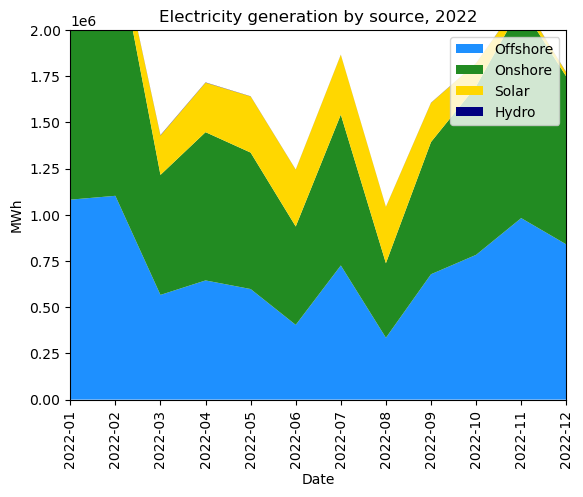

In [27]:
# Set the date column as the index
date = df4['date']

# Create stacked area chart
plt.stackplot(date, df4['Offshore_MWh'], df4['Onshore_MWh'], df4['Solar_MWh'], df4['HydroPowerMWh'], labels=['Offshore', 'Onshore', 'Solar', 'Hydro'], colors=['dodgerblue', 'forestgreen', 'gold', 'navy'])
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('MWh')
plt.xlim([0, 11])
plt.ylim([0, 2000000])
plt.xticks(rotation=90)
plt.title('Electricity generation by source, 2022')
plt.show()

The figure above provides an overview of the electricity generation distribution throughout the year 2022. It highlights the prominent role of onshore windmill farms as the primary source of green energy, consistently contributing the highest energy generation levels across all seasons. Notably, during the fall and winter months, when wind conditions are generally more favorable, onshore wind production reaches its peak.

Furthermore, the data reveals a distinct pattern in solar power generation, with significantly higher levels observed during the spring and summer seasons. This observation aligns with expectations, as these seasons offer greater solar irradiation and longer daylight hours. The seasonality in the dataset indicates a clear relationship between solar energy generation and the annual cycle.

Overall, the graph showcases the dynamic nature of renewable energy generation in 2022, highlighting the dominance of onshore wind power and the seasonal variations in solar energy production.

Next we will look at the relationship between renewable electricity and conventional electricity by comparing the two against each other.



In [17]:
# Calculate the total renewable energy generation
df4['Renew']=(df4['Offshore_MWh']+df4['Onshore_MWh']+df4['Solar_MWh']+df4['HydroPowerMWh'])

# Calculate the conventional energy consumption by subtracting the renewable energy generation from the gross consumption

df4['Conv']=(df4['GrossConsumptionMWh']-df4['Renew'])


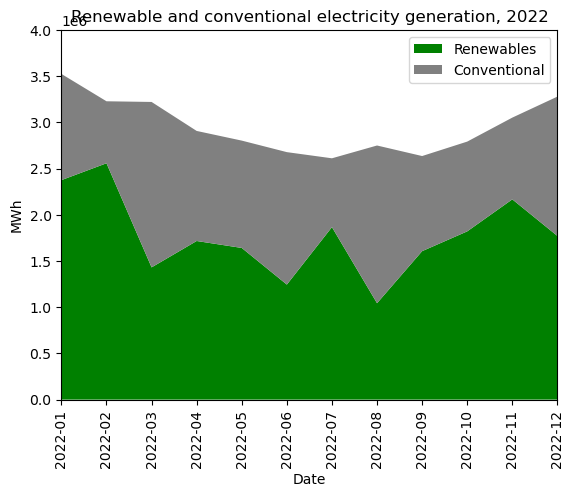

In [18]:
# Create stacked area chart
plt.stackplot(date, df4['Renew'], df4['Conv'], labels=['Renewables', 'Conventional'], colors=['green', 'gray'])
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('MWh')
plt.xlim([0, 11])
plt.ylim([0, 4*10**6])
plt.xticks(rotation=90)
plt.title('Renewable and conventional electricity generation, 2022')
plt.show()

In the figure above the relationship between conventional and renewable electricity is shown. It is clear that more conventional electricity is produced. The total production of electricity is more smooth than the figure of only renewable energy. This indicates that the production of conventional electricity is larger when there is less renewable electricity available.  The figure also shows some seasonality, the generation of total electricity is smaller in the spring and summer than the rest of the year.

# Conclusion

The analysis of renewable electricity and the demand i Denmark, is crucial for optimizing the usage and thereby reducing greenhouse gas emissions. The analysis shows that the biggest contributor to renewable electricity in Denmark is the onshore windmill farms. Overall we find that there is a big production of renwable energy in Denmark and further analysis in this topic could provide insights for policymakers and energy companies to make informed decisions to optimize renewable energy use and move towards a sustainable future.